Populating the interactive namespace from numpy and matplotlib


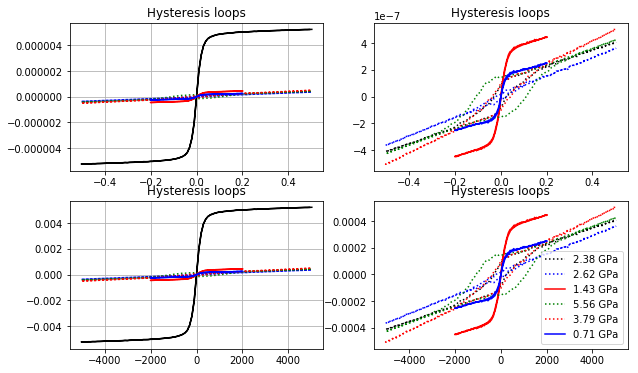

In [17]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import requests

names=['20180615_TM60P0.hys','20180615a.hys','20180615b.hys','20180615c.hys2','20180615d.hys','20180615e.hys','20180615f.hys2']
pressures=['0','2.38 GPa','2.62 GPa','1.43 GPa','5.56 GPa','3.79 GPa','0.71 GPa']
rlow=['187','187','187','287','187','187','187']
rup=['289','289','289','489','289','289','289']
lines=['k-','k:','b:','r-','g:','r:','b-']

HysLink=["https://www.geophysik.uni-muenchen.de/~gilder/P4.3_2018/4.3_2018_Report/"
         ,"https://raw.githubusercontent.com/Nicolucas/Geomag/master/Data/DiaParaMag_adj85/"]
for l in range(2):
    for k in range(2):
        num=219+2*(l+1)+k
        subplot(num)
        for j in range(k,len(names)):
            link = requests.get(HysLink[l]+names[j])
            data = link.text
            arraydata=[]
            t0=[]
            x0=[]
            x1=[]
            temp1=int(rlow[j])
            for i in data.strip().split('\n')[87:temp1]:
                t0.append(float(i.strip('\r').split(',')[0]))
                x0.append(float(i.strip('\r').split(',')[1]))
                x1.append(float(i.strip('\r').split(',')[2]))
            temp2=int(rup[j])
            for i in data.strip().split('\n')[temp1+2:temp2]:
                t0.append(float(i.strip('\r').split(',')[0]))
                x0.append(float(i.strip('\r').split(',')[1]))
                x1.append(float(i.strip('\r').split(',')[2]))

            title("Hysteresis loops")
            plot(t0,x0,lines[j],label=pressures[j])
            xscale('linear')
            yscale('linear')

            grid()
legend()
show()